# Plot UMAP of known & unknown KD

In [1]:
import pandas as pd
from katlas.train import *
from katlas.dnn import *
from fastai.vision.all import *
from katlas.pssm import *

In [4]:
from katlas.data import *

In [5]:
kd = Data.get_kd_uniprot()

⬇️ Downloading katlas_dataset.zip ...


Downloading...
From (original): https://drive.google.com/uc?id=17wIl0DbdoHV036Z3xgaT_0H3LlM_W47l
From (redirected): https://drive.google.com/uc?id=17wIl0DbdoHV036Z3xgaT_0H3LlM_W47l&confirm=t&uuid=503c31e6-5e12-424b-86bf-185b223d5cf8
To: /home/sky1ove/git/katlas-raw/nbs/kinase_domain/katlas_datasets.zip
100%|███████████████████████████████████████████████████████████████████████████████████████████| 209M/209M [00:07<00:00, 26.4MB/s]


📂 Extracting to /tmp/katlas_dataset ...
🧹 Removing zip file: katlas_datasets.zip
✅ Done! Extracted dataset is at: /tmp/katlas_dataset


In [11]:
# filter out active motif
kd = kd[kd.active_D1_D2==1].reset_index(drop=True)

## Known kd_id

In [29]:
cddm_known = pd.read_parquet('train/cddm_t5.parquet')
pspa_known = pd.read_parquet('train/pspa_t5.parquet')

In [32]:
known_idx = set(cddm_known.index)|set(pspa_known.index)

In [33]:
len(known_idx)

384

## Predicted kd_id

In [12]:
cddm_pred = pd.read_parquet('raw/pred_new_cddm.parquet')
pspa_pred = pd.read_parquet('raw/pred_new_pspa.parquet')

In [20]:
kd.shape

(4209, 32)

In [19]:
cddm_pred.shape,pspa_pred.shape

((1195, 943), (1230, 230))

In [18]:
cddm_pred.index.isin(kd.kd_ID).sum()

np.int64(1195)

In [36]:
pred_idx= set(cddm_pred.index)|set(pspa_pred.index)

In [37]:
len(pred_idx)

1292

## Get UMAP embedding

In [24]:
from katlas.plot import *

In [21]:
t5 = pd.read_parquet('raw/t5_kd.parquet')

In [26]:
umap_df = reduce_feature(t5,method='umap',complexity=30,min_dist=0.6)

/home/sky1ove/git/katlas/.venv/lib/python3.11/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [44]:
info = pd.Series('Unknown', index=umap_df.index)

In [47]:
info.loc[umap_df.index.isin(pred_idx)] = 'Predicted'
info.loc[umap_df.index.isin(known_idx)] = 'Known'

In [60]:
cnts = info.value_counts()
info_labeled = info.map(lambda x: f"{x} (n={cnts[x]:,})")

In [61]:
info_labeled

kd_ID
A0A075F7E9_LERK1_ORYSI_KD1      Unknown (n=2,555)
A0A078CGE6_M3KE1_BRANA_KD1      Unknown (n=2,555)
A0A0K3AV08_MLK1_CAEEL_KD1       Unknown (n=2,555)
A0A0P0VIP0_LRSK7_ORYSJ_KD1      Unknown (n=2,555)
A0A0P0XII1_CERK1_ORYSJ_KD1      Unknown (n=2,555)
                                     ...         
U4PR86_MELK_CAEEL_KD1           Unknown (n=2,555)
W0LYS5_CAMKI_MACNP_KD1        Predicted (n=1,270)
W0T9X4_ATG1_KLUMD_KD1           Unknown (n=2,555)
W7JX98_KGP_PLAFO_KD1            Unknown (n=2,555)
X5M5N0_WNK_CAEEL_KD1          Predicted (n=1,270)
Length: 4209, dtype: object

Alternatively, use `np.select` to do the same thing:

In [48]:
# conditions = [
#     umap_df.index.isin(known_idx),
#     umap_df.index.isin(pred_idx),
# ]
# choices = ['Known', 'Predicted']
# out =np.select(conditions, choices, default='Unknown')
# pd.Series(out,index=umap_df.index)

## Plot 2D

In [54]:
len(umap_df)

4209

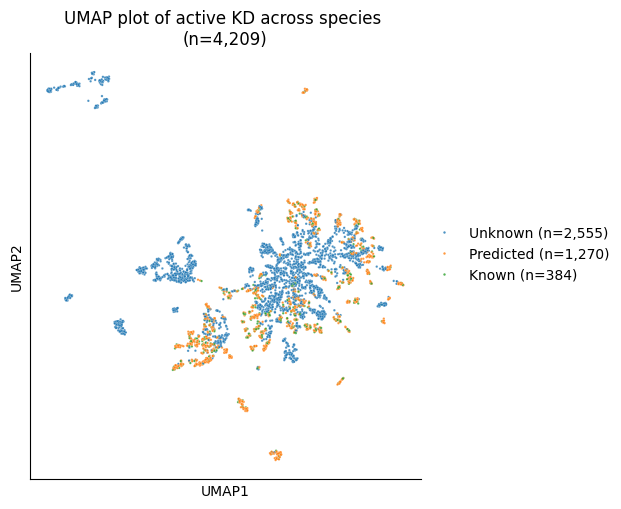

In [63]:
plot_2d(umap_df,hue=info_labeled,s=3,legend=True,palette='tab10',legend_title='')
plt.title('UMAP plot of active KD across species \n(n=4,209)')
save_svg('fig/umap_kd_known_unknown.svg')